In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
videos=pd.read_csv('F:\\1-Youtube Text Data Analysis-20201009T081158Z-001\\1-Youtube Text Data Analysis\\UScomments.csv',error_bad_lines=False)
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

# Sentiment Analysis

In [7]:
from textblob import TextBlob

In [8]:
TextBlob('happy').sentiment.polarity

0.8

In [10]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
videos['polarity']=polarity

# EDA for the +ve and -ve sentences

In [18]:
positive=videos[videos['polarity']==1]
positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [46]:
negative=videos[videos['polarity']==-1]
negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [47]:
positive_comments=(' '.join(positive['comment_text']))
len(positive_comments)

846560

In [26]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

(-0.5, 999.5, 499.5, -0.5)

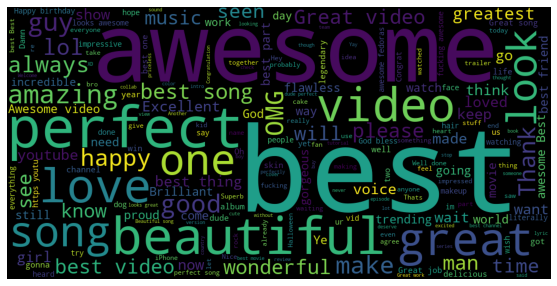

In [33]:
word_cloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(positive_comments)
plt.figure(figsize=(15,5))
plt.imshow(word_cloud)
plt.axis('off')

In [49]:
negative_comments=(' '.join(negative['comment_text']))

(-0.5, 999.5, 499.5, -0.5)

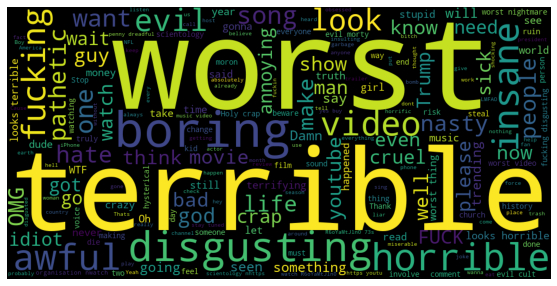

In [58]:
negative_word_cloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(negative_word_cloud)
plt.axis('off')

# Analyze trending tags and youtube views

In [65]:
vid=pd.read_csv('F:\\1-Youtube Text Data Analysis-20201009T081158Z-001\\1-Youtube Text Data Analysis\\USvideos.csv',error_bad_lines=False)
vid.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [72]:
full_tags=(' '.join(vid['tags']))
print(full_tags)

logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar w

In [76]:
import re
tags=re.sub(' +',' ',re.sub('[^a-zA-Z]',' ',full_tags))
print(tags)

logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Ar

(-0.5, 999.5, 499.5, -0.5)

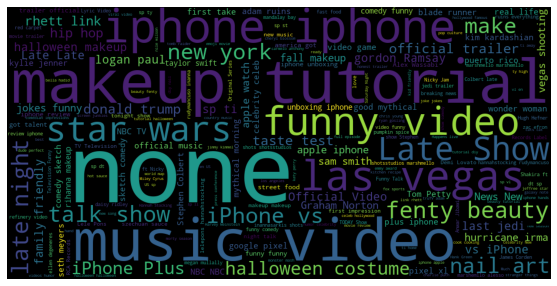

In [82]:
wordcloud_tags=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_tags)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for likes and views')

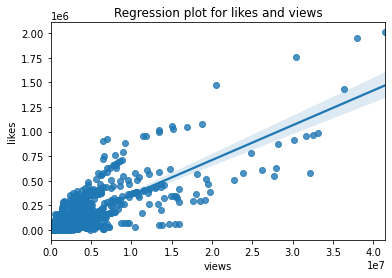

In [83]:
sns.regplot(data=vid,x='views',y='likes')
plt.title('Regression plot for likes and views')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

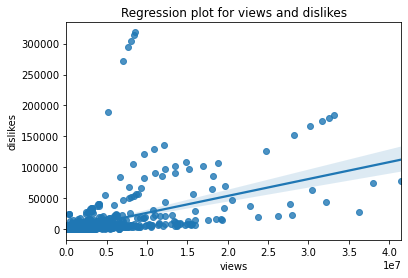

In [85]:
sns.regplot(data=vid,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

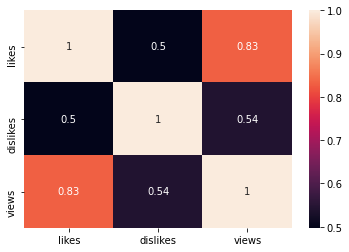

In [87]:
vid_corr=vid[['likes','dislikes','views']]
sns.heatmap(vid_corr.corr(),annot=True)

In [88]:
!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=1fcb9983ff474bf48b38d25a35afd062ce395ea28ce4d130fba7486a52ea7374
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [100]:
videos['comment_text'].isna().sum()

25

In [99]:
v=videos.dropna()
len(v)

691375

In [135]:
import emoji
str=''
for i in videos['comment_text']:
    try:
        list=[c for c in i if c in emoji.UNICODE_EMOJI]
        for j in list:
                str=str+j
    except:
        pass
len(str)

304745

In [139]:
results={i:str.count(i) for i in set(str)}
results={k:v for k,v in sorted(results.items(), key=lambda item:item[1])}
results

{'🧢': 1,
 '🤬': 1,
 '♾': 1,
 '🤪': 1,
 '🤭': 1,
 '🤟': 1,
 '🔟': 2,
 '🤨': 2,
 '⏭': 2,
 '🛢': 2,
 '⚙': 2,
 '🖲': 2,
 '⏺': 2,
 '☣': 2,
 '🏷': 2,
 '⏹': 2,
 '⚗': 2,
 '⏸': 2,
 '⏯': 2,
 '🎏': 2,
 '⚒': 2,
 '🗄': 2,
 '🖨': 2,
 '☦': 2,
 '🛣': 3,
 '🚕': 3,
 '🏎': 3,
 '⛰': 3,
 '◽': 3,
 '🚏': 3,
 '🕹': 3,
 '➗': 3,
 '🏮': 3,
 '🖇': 3,
 '🏑': 3,
 '🖌': 3,
 '🧐': 3,
 '🕳': 3,
 '🗜': 3,
 '📴': 3,
 '🔳': 3,
 '🗳': 3,
 '🗂': 3,
 '🗓': 3,
 '🗞': 3,
 '🛶': 3,
 '☂': 3,
 '◼': 3,
 '🗃': 3,
 '⏲': 3,
 '💹': 3,
 '🔖': 3,
 '🕉': 3,
 '🎎': 3,
 '🗒': 3,
 '☸': 3,
 '⚛': 3,
 '🤺': 3,
 '◻': 3,
 '🛩': 3,
 '⏮': 3,
 '🈸': 4,
 '🕑': 4,
 '🏧': 4,
 '🚚': 4,
 '🕟': 4,
 '🚟': 4,
 '🕦': 4,
 '🚃': 4,
 '⏫': 4,
 '🏚': 4,
 '⏱': 4,
 '🚜': 4,
 '🚄': 4,
 '🏔': 4,
 '🛃': 4,
 '🈷': 4,
 '🈚': 4,
 '🕣': 4,
 '☪': 4,
 '⏪': 4,
 '⌨': 4,
 '🔃': 4,
 '🦍': 4,
 '🕙': 4,
 '🌫': 4,
 '❔': 4,
 '🔲': 4,
 '➿': 4,
 '🕘': 4,
 '⛏': 4,
 '🎐': 4,
 '🈺': 4,
 '🥜': 4,
 '🆚': 4,
 '🕚': 4,
 '🌥': 4,
 '⏬': 4,
 '🛤': 4,
 '🕗': 4,
 '🏘': 4,
 '🚎': 4,
 '🏛': 4,
 '🚖': 4,
 '🏤': 4,
 '↕': 4,
 '🚐': 4,
 '🔏': 4,
 '✡': 4,
 'Ⓜ': 4,
 '🕍': 4,
 

In [143]:
keys=[*results.keys()]
values=[*results.values()]
df=pd.DataFrame({'char':keys[-20:],'num':values[-20:]})
df

char    num
0     🤣   2279
1     🏼   2549
2     😢   2672
3     💙   2831
4     👌   3112
5     😬   3381
6     💜   3429
7     🏻   3438
8     😊   3596
9     ♥   4909
10    💕   5147
11    💖   5359
12    👍   5476
13    😘   5545
14    👏   5719
15    😭   8398
16    🔥   8694
17    ❤  31119
18    😍  33453
19    😂  36987

In [144]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [145]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=b1190f246d9b3751a87b3a2e960c319ba281c8d7108e593599c362b825d4e71b
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [148]:
import plotly.graph_objs as p
from plotly.offline import iplot
trace=p.Bar(x=df['char'],y=df['num'])
iplot([trace])